In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt


In [4]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [31]:
print(len(train_labels))

60000


In [32]:
print(train_images[0].shape)

(28, 28, 1)


In [33]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

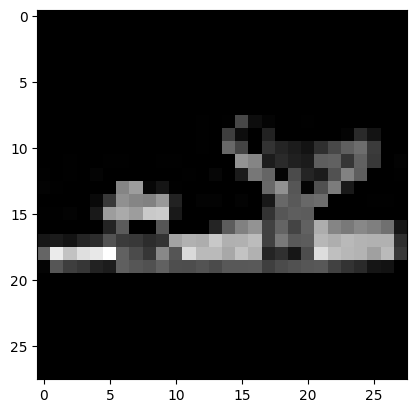

In [38]:
plt.imshow(train_images[59999], cmap='gray')
plt.show()

In [39]:
print(train_labels[59999])

5


In [9]:
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [ ]:
train_images.shape

In [ ]:
test_images.shape

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
history = model.fit(train_images,train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9662 - loss: 0.0881 - val_accuracy: 0.8946 - val_loss: 0.4771
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9667 - loss: 0.0858 - val_accuracy: 0.8985 - val_loss: 0.4868
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9681 - loss: 0.0808 - val_accuracy: 0.8952 - val_loss: 0.5073
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9709 - loss: 0.0757 - val_accuracy: 0.8967 - val_loss: 0.5263
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9715 - loss: 0.0763 - val_accuracy: 0.8916 - val_loss: 0.5396
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9745 - loss: 0.0694 - val_accuracy: 0.8949 - val_loss: 0.5304
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0661 - val_accuracy: 0.8874 - val_loss: 0.6225
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9736 - loss: 0.0668

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)



313/313 - 1s - 2ms/step - accuracy: 0.8955 - loss: 0.7158

Test Accuracy: 0.8955000042915344


Text(0, 0.5, 'Accuracy')

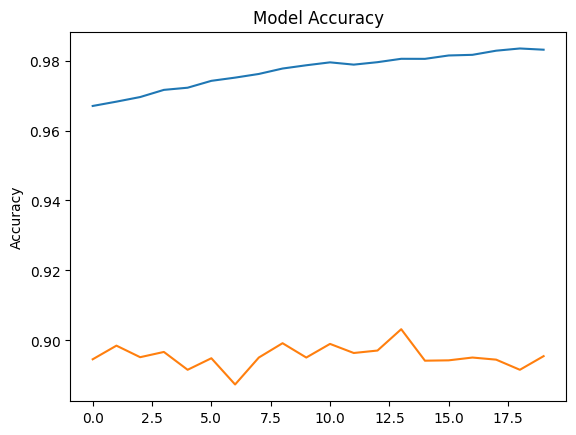

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

In [34]:
model.save('trained_fashion_mnist_model.h5')

In [16]:
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import glob

Path of the image to be checked: /content/sample_data/ytf2464bu4_fl_b_za.jpg


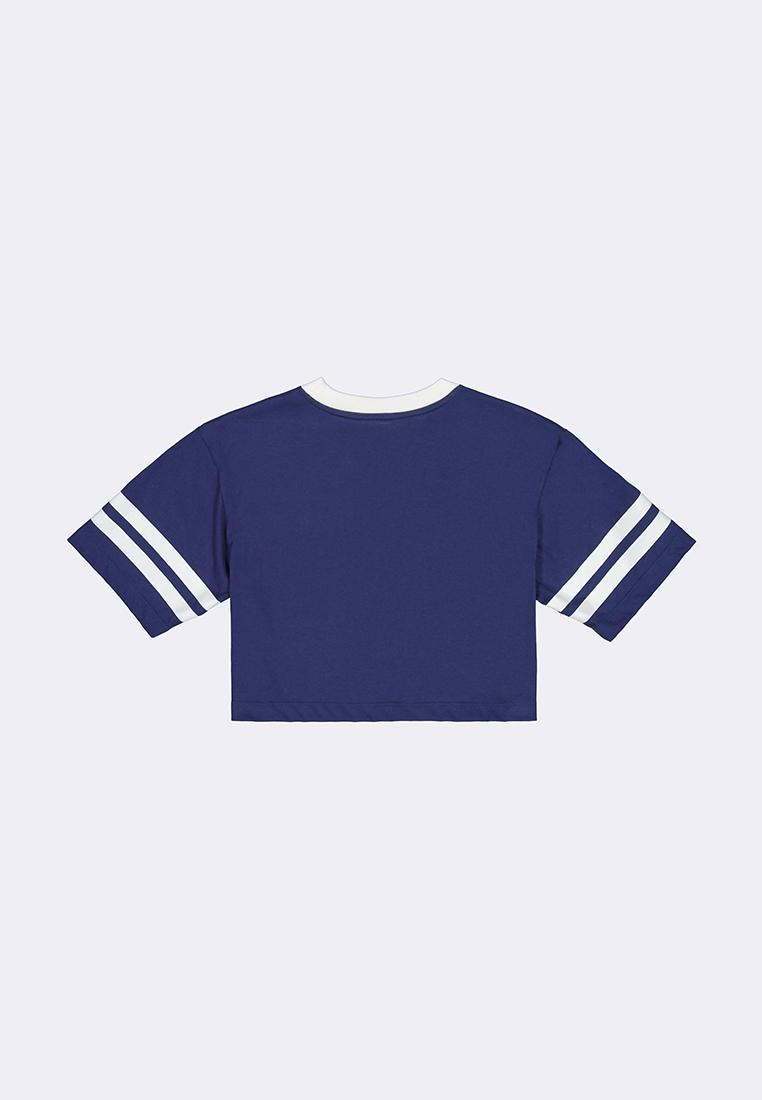

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification:  Shirt


In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

input_image_path = input('Path of the image to be checked: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,28,28,1])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
prediction = class_names[input_pred_label]
print('Classification: ', prediction)

In [21]:
# input_image_path = input('Path of the image to be checked: ')

# input_image = cv2.imread(input_image_path)

# img = Image.open(input_image)

# img = img.resize((28,28))

# img = img.convert('L')
# img_array = np.array(img)/255.0
# img_array = img_array.reshape((1,28,28,1))
# input_prediction = model.predict(img_array)
# input_pred_label = np.argmax(input_prediction)




Path of the image to be checked: /content/sample_data/cheaney-trudie-capped-derby-boot-in-black-calf-leather-p942-6626_zoom.jpg


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
# input_image_path = input('Path of the image to be checked: ')

# input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

# input_image_resize = cv2.resize(input_image, (224,224))

# input_image_scaled = input_image_resize/255

# image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# input_prediction = model.predict(image_reshaped)

# input_pred_label = np.argmax(input_prediction)

# if input_pred_label == 0:
#   print('The image is a cat.')
# else:
#   print('The image is a dog.')